In [1]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
from intersect import intersection
import itertools

In [2]:
#Estimated PK parameter
ka = 45.4382
k10 =  0.2355
k12 =  0.175
k21 =  0.0259
Vc =  162.69

k13 = 44.2394
k30 = 0.00975

In [3]:
#Compartment model
def ode(t, z):
    Z0 = z[0]; Z1 = z[1]; Z2 = z[2]; Z3 = z[3]
    dZ0 = -ka*Z0
    dZ1 = (ka/Vc)*Z0 - k10*Z1 - k12*Z1 + k21*Z2
    dZ2 = k12*Z1 - k21*Z2
    dZ3 = k13*Z1 - k30*Z3
    d = [dZ0,dZ1,dZ2,dZ3]
    return d

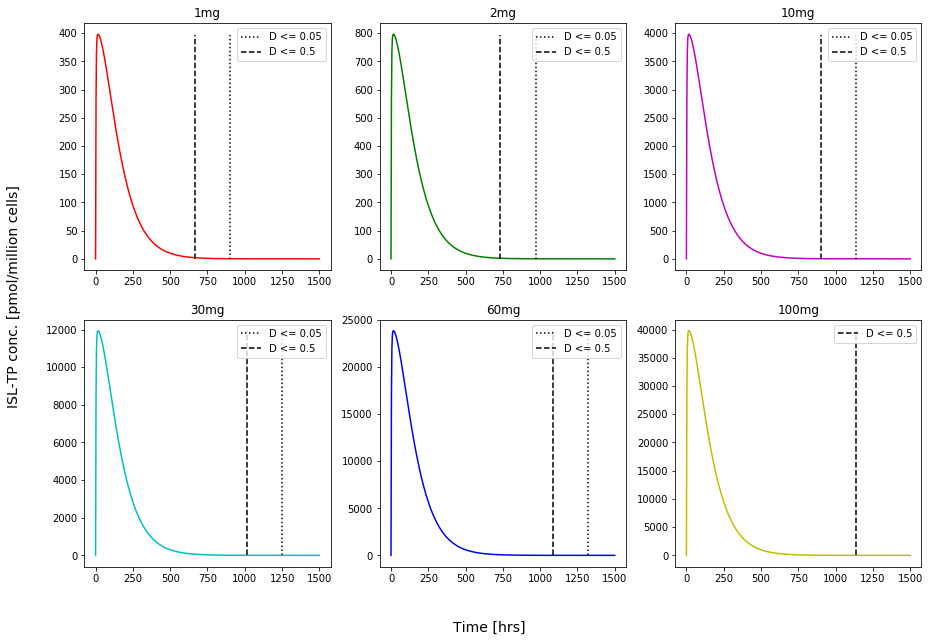

In [4]:
#plot result
t0 = 0; tfinal = 1500 #hrs
fig, axs = plt.subplots(2,3, figsize=(15, 10), facecolor='w', edgecolor='k')

doses = [1,2,10,30,60,100]
c = ['r-', 'g-', 'm-','c-', 'b-', 'y-']

axs = axs.ravel()

for i in range(len(doses)):
    z0 = [doses[i]*3410, 0, 0, 0]
    t = np.linspace(t0, tfinal, 500)
    res = solve_ivp(ode, (t0,tfinal), z0, t_eval=t)
    Z3List = list(np.multiply(res.y[3],0.18)) #to pmol/million cells
    tList = list(t)
    
    axs[i].set_title(str(doses[i])+'mg')
    axs[i].plot(tList,Z3List,c[i])
    indlist = np.argwhere(np.array(Z3List[50:])<=0.05) #threshold D <= 0.05
    indlist2 = np.argwhere(np.array(Z3List[50:])<=0.5) ##threshold D <= 0.5
    ind = list(itertools.chain.from_iterable(indlist))
    ind2 = list(itertools.chain.from_iterable(indlist2))
    tt = np.argwhere(np.array(tList) > 672)
    tt2 = list(itertools.chain.from_iterable(tt))
    if ind != []:
        axs[i].plot([tList[ind[0]]]*len(tList),np.arange(0,int(max(Z3List)),(int(max(Z3List))/len(tList))),'k:', label='D <= 0.05')
        #print(tList[ind[0]], ind[0])
    if ind2 != []:
        axs[i].plot([tList[ind2[0]]]*len(tList),np.arange(0,int(max(Z3List)),(int(max(Z3List))/len(tList))),'k--', label='D <= 0.5')
        #print(tList[ind2[0]])
        #print()
    if tt2 != []:
        #print(Z4List[tt2[0]])
    #x, y = intersection(tList, [0.5*cmax]*len(tList), tList[20:], Z4List[20:])
    #axs[i].plot([y[0]]*int(x[0]),'k-', label='half-life = '+str(round(x[0],2)))
    #axs[i].plot([x[0]]*len(list(np.arange(0,y[0],0.001))),list(np.arange(0,y[0],0.001)),'k-')
    #axs[i].plot(tList,[0.05]*len(tList),'k:', label='PK thres. of 0.05')
        axs[i].legend(loc='upper right')
    #print('endpoind of D = ', Z4List[-1:])
    #print('max', 0.5*cmax)
    #print('int', x[0], y[0])
    

fig.text(0.5, 0.04, 'Time [hrs]', ha='center', va='center',fontsize=14);
fig.text(0.06, 0.5, 'ISL-TP conc. [pmol/million cells]', ha='center', va='center', rotation='vertical',fontsize=14);